<a href="https://colab.research.google.com/github/mahesh-keswani/ML-DL-Basics/blob/main/keras_examples/OcclsionExp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Soruce: https://github.com/oswaldoludwig/Sensitivity-to-occlusion-Keras-/blob/master/occlusion_sensitivity.py
# https://www.youtube.com/watch?v=DaLZRH6D7wo&list=PLyqSpQzTE6M9gCgajvQbc68Hk_JKGBAYT&index=96

import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy
import math
import pylab
import seaborn as sns
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [2]:
model = VGG16(weights='imagenet')

In [3]:
# The local path to our target image
img_path = '/content/bird.jpg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))

# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

In [4]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n01558993', 'robin', 0.9995433), ('n04604644', 'worm_fence', 0.00042211605), ('n01530575', 'brambling', 2.9808634e-05)]


In [5]:
OCCLUDING_SIZE = 100
OCCLUDING_PIXEL = 0
OCCLUDING_STRIDE = 5

In [8]:
def Occlusion_exp(image, processed_image, occluding_size, occluding_pixel, occluding_stride):
    preds = model.predict(processed_image)
    # getting the index of class with highest probability for a first sample
    winning_class = np.argmax(preds[0])

    # image.shape = (640, 426, 3)
    height, width, _ = image.shape
    # output_height = 67
    output_height = int(math.ceil((height-occluding_size) / occluding_stride + 1))
    # output_width = 109
    output_width = int(math.ceil((width-occluding_size) / occluding_stride + 1))

    heatmap = np.zeros((output_height, output_width))

    for h in range(output_height):
        for w in range(output_width):
            # Occluder region:
            h_start = h * occluding_stride
            w_start = w * occluding_stride

            h_end = min(height, h_start + occluding_size)
            w_end = min(width, w_start + occluding_size)

            # Getting the image copy, applying the occluding window and classifying it again:
            input_image = copy.copy(image)
            input_image[h_start:h_end, w_start:w_end,:] =  occluding_pixel

            im = cv2.resize(input_image, (224, 224)).astype(np.float32)
            im = np.expand_dims(im, axis=0)

            x = preprocess_input(im)
            out = model.predict(x)
            out = out[0]

            # getting the  probability for the target class
            prob = out[winning_class]

            # storing the probability for heatmap
            heatmap[h, w] = prob

        print('scanned {} Rows'.format(h + 1) )
    return heatmap

In [9]:
img = cv2.imread( img_path )

heatmap = Occlusion_exp(img, x, OCCLUDING_SIZE, OCCLUDING_PIXEL, OCCLUDING_STRIDE)

scanned 1 Rows
scanned 2 Rows
scanned 3 Rows
scanned 4 Rows
scanned 5 Rows
scanned 6 Rows
scanned 7 Rows
scanned 8 Rows
scanned 9 Rows
scanned 10 Rows
scanned 11 Rows
scanned 12 Rows
scanned 13 Rows
scanned 14 Rows
scanned 15 Rows
scanned 16 Rows
scanned 17 Rows
scanned 18 Rows
scanned 19 Rows
scanned 20 Rows
scanned 21 Rows
scanned 22 Rows
scanned 23 Rows
scanned 24 Rows
scanned 25 Rows
scanned 26 Rows
scanned 27 Rows
scanned 28 Rows
scanned 29 Rows
scanned 30 Rows
scanned 31 Rows
scanned 32 Rows
scanned 33 Rows
scanned 34 Rows
scanned 35 Rows
scanned 36 Rows
scanned 37 Rows
scanned 38 Rows
scanned 39 Rows
scanned 40 Rows
scanned 41 Rows
scanned 42 Rows
scanned 43 Rows
scanned 44 Rows
scanned 45 Rows
scanned 46 Rows
scanned 47 Rows
scanned 48 Rows
scanned 49 Rows
scanned 50 Rows
scanned 51 Rows
scanned 52 Rows
scanned 53 Rows
scanned 54 Rows
scanned 55 Rows
scanned 56 Rows
scanned 57 Rows
scanned 58 Rows
scanned 59 Rows
scanned 60 Rows
scanned 61 Rows
scanned 62 Rows
scanned 63 Rows
s

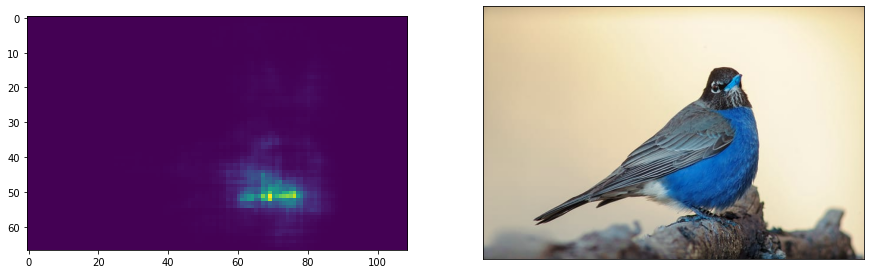

In [21]:
f = pylab.figure(figsize=(15, 10))

f.add_subplot(1, 2, 1)  # this line outputs images side-by-side    
plt.imshow(heatmap, cmap='viridis', interpolation='nearest')

f.add_subplot(1, 2, 2)
plt.imshow( img )

plt.xticks([])
plt.yticks([]);